In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f'{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPU')
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU found, training will default to CPU.")

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Check number of images in each folder
path = "/content/drive/MyDrive/KaggleData/Image_Dataset/"
dir_list = [os.path.join(path,i) for i in os.listdir(path) if os.path.isdir(os.path.join(path,i))]
size_dict = {}
for i,value in enumerate(dir_list):
    size_dict[os.listdir(path)[i]] = len(os.listdir(value))
size_dict

{'Benign': 2480, 'Malignant': 5429}

In [ ]:
# Save the Dataset with Pickle

import pickle

# Specify the filename you want to save the dataset as
dataset_filename = '/content/drive/MyDrive/KaggleData/full_data.pkl'

# Open a file in binary-write mode and dump the full_data list into it
with open(dataset_filename, 'wb') as dataset_file:
    pickle.dump(full_data, dataset_file)

print(f"Dataset successfully saved to {dataset_filename}")


Dataset successfully saved to /content/drive/MyDrive/KaggleData/Image_Dataset/full_data.pkl


In [ ]:
# Loading the Dataset Back
import pickle
# Open the file in binary-read mode and load the data
# Specify the filename you want to save the dataset as
dataset_filename = '/content/drive/MyDrive/KaggleData/full_data.pkl'


with open(dataset_filename, 'rb') as dataset_file:
    loaded_data = pickle.load(dataset_file)

print("Dataset successfully loaded.")
# print(f"Total number of samples in the dataset: {len(loaded_data)}")
# # Optionally, verify by inspecting the first few samples
# print(loaded_data[:5])
# #

Dataset successfully loaded.


In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming IMG_SIZE is defined; if not, you need to set it according to your image dimensions
IMG_SIZE = 224  # Example image size

# Load the dataset
with open('/content/drive/MyDrive/KaggleData/full_data.pkl', 'rb') as file:
    full_data = pickle.load(file)

# Prepare your data and labels
full_images = np.array([item[0] for item in full_data])  # Image data
full_labels = np.array([item[1] for item in full_data])  # Labels

# Reshape image data for SMOTE
full_images_reshaped = full_images.reshape(-1, IMG_SIZE * IMG_SIZE * 3)

# Initial train/test split with stratification
training_data_reshaped, test_data_reshaped, training_labels, test_labels = train_test_split(
    full_images_reshaped, full_labels, test_size=0.1, random_state=30, stratify=full_labels)

# Apply SMOTE on the reshaped training data
sm = SMOTE(random_state=42)
training_data_resampled, training_labels_resampled = sm.fit_resample(training_data_reshaped, training_labels)

# Reshape the data back to its original shape after SMOTE
training_dataset = training_data_resampled.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Extracting validation dataset from the training data (with stratification)
training_dataset, val_dataset, training_labels, val_labels = train_test_split(
    training_dataset, training_labels_resampled, test_size=0.1, random_state=30, stratify=training_labels_resampled)

# Reshape test data back to its original shape
test_dataset = test_data_reshaped.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(f"Training dataset size: {len(training_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


Training dataset size: 8794
Validation dataset size: 978
Test dataset size: 791


In [ ]:
# # #Performing the dataset splitting into training and test set
# training_data, test_dataset = train_test_split(full_data, test_size = 0.1, random_state = 30)

In [ ]:
# # #Extracting validation dataset from the training data
# training_dataset, val_dataset = train_test_split(training_data, test_size = 0.1, random_state = 30)

In [ ]:
"""Function to separate the dataset into images and label puting the images in array called feature_map and labels into
array called label"""

def split_data(main_data):
    feature_matrix = []
    label = []
    for x,y in main_data:
        feature_matrix.append(x)
        label.append(y)
    return np.array(feature_matrix), np.array(label)

# **Extracting Training dataset**

In [ ]:
#Extract validation images and labels
# training_images, training_labels = split_data(training_dataset)

In [ ]:
# Normalize training dataset
training_dataset = np.array(training_dataset, dtype="float32") / 255.0

# Normalize validation dataset
val_dataset = np.array(val_dataset, dtype="float32") / 255.0

# Normalize test dataset
test_dataset = np.array(test_dataset, dtype="float32") / 255.0


In [ ]:
# Normalize images
training_images = np.array(training_images, dtype="float") / 255.0

In [ ]:
#The shape of the datasets
print(training_images.shape)
print(training_labels.shape)

(6406, 224, 224, 3)
(6406,)


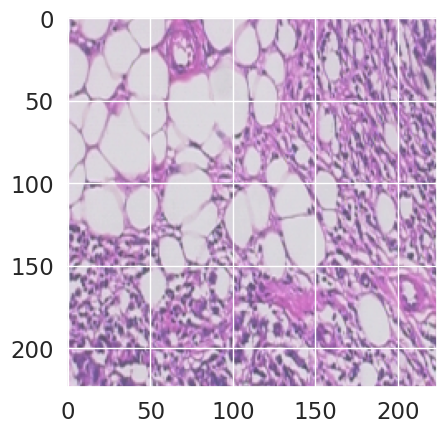

In [ ]:
#The first image as a picture
plt.imshow(training_images[0])

In [ ]:
#The first label in the dataset
training_labels[0]

1

In [ ]:
#Check the data distribution among the classes
print(pd.Series(training_labels).value_counts())

1    4397
0    2009
dtype: int64


# **Extracting Test dataset**

In [ ]:
#Extract validation images and labels
test_images, test_labels = split_data(test_dataset)

In [ ]:
# Normalize images
test_images = np.array(test_images, dtype="float") / 255.0

In [ ]:
#The shape of the datasets
print(test_images.shape)
print(test_labels.shape)

(791, 224, 224, 3)
(791,)


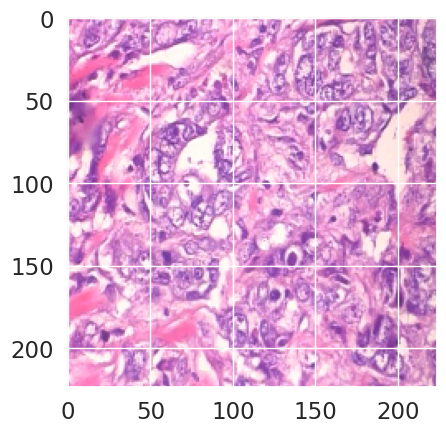

In [ ]:
#The first image as a picture
plt.imshow(test_images[0])

In [ ]:
#The first label in the dataset
test_labels[0]

1

In [ ]:
import pandas as pd
#Check the data distribution among the classes
print(pd.Series(test_labels).value_counts())

1    543
0    248
dtype: int64


# **Extracting Validation dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Extract validation images and labels
val_images, val_labels = split_data(val_dataset)

In [ ]:
import numpy as np
# Normalize images
val_images = np.array(val_images, dtype="float") / 255.0

In [ ]:
#The shape of the datasets
print(val_images.shape)
print(val_labels.shape)

(712, 224, 224, 3)
(712,)


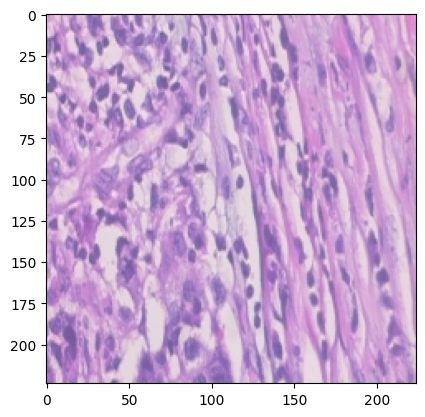

In [ ]:
#The first image as a picture
plt.imshow(val_images[0])

In [ ]:
#The first label in the dataset
val_labels[0]

1

In [ ]:
import pandas as pd

# Check the data distribution among the classes for training, validation, and test sets
print("Training labels distribution:\n", pd.Series(training_labels).value_counts())
print("Validation labels distribution:\n", pd.Series(val_labels).value_counts())
print("Test labels distribution:\n", pd.Series(test_labels).value_counts())


Training labels distribution:
 1    4397
0    4397
dtype: int64
Validation labels distribution:
 0    489
1    489
dtype: int64
Test labels distribution:
 1    543
0    248
dtype: int64


# Model Training

In [ ]:
#Importing libraries needed for the modeling and training
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Setting the batch size for the cnn model
bs = 64

In [ ]:
#Defining Image Data Generator for image augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range=0.2)

# Custom CNN Model 1

In [ ]:
#Defining the base model
cancer_model = Sequential()

#First Layer
cancer_model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (224,224,3), activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Second Layer
cancer_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Third Layer
cancer_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.4))

#Fourth Layer
cancer_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.2))

#Fifth Layer
cancer_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Flattening the layers
cancer_model.add(Flatten())

#Adding the dense layer
cancer_model.add(Dense(256, activation = 'relu'))
cancer_model.add(Dense(128, activation = 'relu'))
cancer_model.add(Dense(1, activation = 'sigmoid'))

cancer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 128)       0

In [ ]:
#Setting the learning rate to reduce gradually over the training period
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=20*50,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
#Compiling the model
cancer_model.compile(loss='binary_crossentropy', optimizer = get_optimizer(), metrics = ['accuracy'])
# early_stop = EarlyStopping(monitor='val_loss',patience=5)
# checkpoint = ModelCheckpoint("./Best_model/",save_best_only=True,)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)

In [47]:
# Assuming training_dataset and val_dataset are your prepared and possibly normalized datasets
training_images = training_dataset
val_images = val_dataset


#Fitted the model on the training and and validation dataset using the image augmentor for 100 epochs
history = cancer_model.fit(datagen.flow(training_images, training_labels, batch_size = bs),
                                     validation_data=datagen.flow(val_images, val_labels),
                                     epochs=50,
                                     callbacks=[rlrp],
                                     verbose = 1)

Epoch 1/50
138/138 [==============================] - 108s 708ms/step - loss: 0.4201 - accuracy: 0.8165 - val_loss: 0.3425 - val_accuracy: 0.8671 - lr: 8.7951e-04
Epoch 2/50
138/138 [==============================] - 97s 703ms/step - loss: 0.3486 - accuracy: 0.8648 - val_loss: 0.3423 - val_accuracy: 0.8845 - lr: 7.8431e-04
Epoch 3/50
138/138 [==============================] - 97s 704ms/step - loss: 0.3289 - accuracy: 0.8753 - val_loss: 0.3298 - val_accuracy: 0.8834 - lr: 7.0771e-04
Epoch 4/50
138/138 [==============================] - 97s 700ms/step - loss: 0.3295 - accuracy: 0.8696 - val_loss: 0.3163 - val_accuracy: 0.8804 - lr: 6.4475e-04
Epoch 5/50
138/138 [==============================] - 98s 708ms/step - loss: 0.3183 - accuracy: 0.8804 - val_loss: 0.3005 - val_accuracy: 0.8865 - lr: 5.9207e-04
Epoch 6/50
138/138 [==============================] - 96s 697ms/step - loss: 0.3031 - accuracy: 0.8861 - val_loss: 0.3038 - val_accuracy: 0.8814 - lr: 5.4735e-04
Epoch 7/50
138/138 [=======

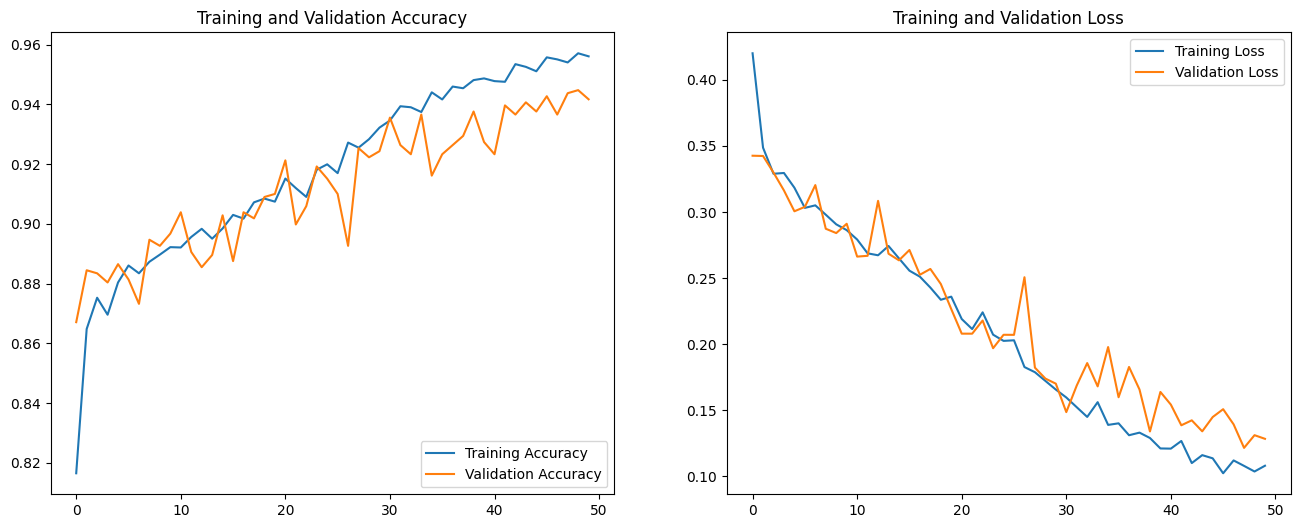

In [48]:
#Plotting the model results

#Getting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#Getting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

#No of epochs it trained
epochs_range = history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Performance Evaluation of custom CNN model 1

In [53]:
import numpy as np

y_pred = cancer_model.predict(test_dataset)


# y_pred = cancer_model.predict(test_images)

25/25 [==============================] - 1s 47ms/step


In [54]:
print(y_pred)

[[9.99994874e-01]
 [9.99965549e-01]
 [9.05130148e-01]
 [9.88917470e-01]
 [2.82516261e-03]
 [2.79852282e-03]
 [9.33645606e-06]
 [9.96740997e-01]
 [9.96764660e-01]
 [5.66582620e-01]
 [9.99999523e-01]
 [9.99791920e-01]
 [9.99862671e-01]
 [1.00000000e+00]
 [9.80358124e-01]
 [9.97126997e-01]
 [1.53792918e-01]
 [1.69940218e-02]
 [4.61766958e-01]
 [1.58134654e-01]
 [9.98851299e-01]
 [9.99995708e-01]
 [2.77222916e-05]
 [9.94068027e-01]
 [3.40951234e-02]
 [9.28319618e-02]
 [9.99953270e-01]
 [3.65529908e-04]
 [2.56885979e-02]
 [9.95421588e-01]
 [1.45320697e-02]
 [9.73222673e-01]
 [9.99997377e-01]
 [9.99377191e-01]
 [1.11196243e-06]
 [3.31612408e-01]
 [9.94740069e-01]
 [9.43527102e-01]
 [9.99965906e-01]
 [9.64872003e-01]
 [9.99404907e-01]
 [9.99969959e-01]
 [9.96523261e-01]
 [7.48852789e-01]
 [9.97112274e-01]
 [6.71265787e-03]
 [3.23945045e-04]
 [4.48783487e-03]
 [1.67076495e-02]
 [9.99999404e-01]
 [9.57635716e-02]
 [9.99902010e-01]
 [7.77880028e-02]
 [7.68643677e-01]
 [1.74272736e-03]
 [9.983413

In [55]:
#Round up model prediction to 0 and 1 and convert result to an array
rounded = [float(np.round(x)) for x in y_pred]
rounded_predictions = np.asarray(rounded).astype(int)
print(rounded_predictions)

[1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 

<ipython-input-55-eb069268529b>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rounded = [float(np.round(x)) for x in y_pred]


In [56]:
#Round up model prediction to 0 and 1 and convert result to an array
rounded = [float(np.round(x)) for x in y_pred]
rounded_predictions = np.asarray(rounded).astype(int)
print(rounded_predictions)

[1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 

<ipython-input-56-eb069268529b>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rounded = [float(np.round(x)) for x in y_pred]


In [57]:
#Classification report
print(classification_report(test_labels, rounded_predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.89       248
           1       0.94      0.96      0.95       543

    accuracy                           0.94       791
   macro avg       0.93      0.92      0.92       791
weighted avg       0.94      0.94      0.94       791



[[217  31]
 [ 20 523]]


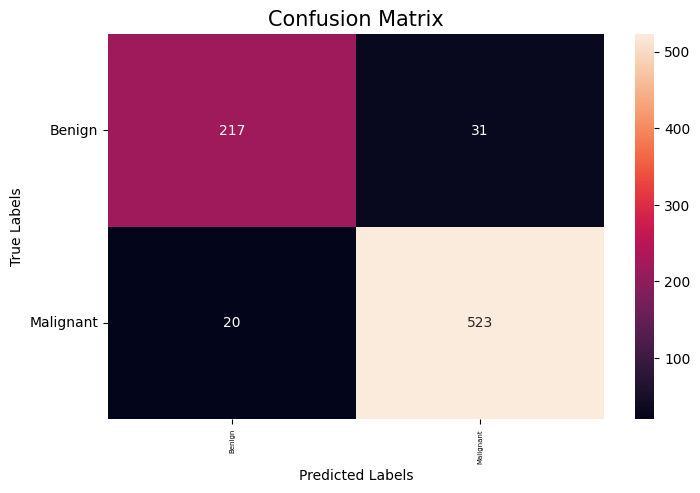

In [58]:
#Confusion matrix
cm = confusion_matrix(test_labels, rounded_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Benign', 'Malignant']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
#Accuracy
accuracy = accuracy_score(test_labels, rounded_predictions)
print('Accuracy: %f' % accuracy)

Accuracy: 0.930468


In [ ]:
#Precision
precision = precision_score(test_labels, rounded_predictions)
print('Precision: %f' % precision)

Precision: 0.935714


In [ ]:
# Recall
recall = recall_score(test_labels, rounded_predictions, pos_label=1)
print('Recall: %f' % recall)

Recall: 0.965009


In [ ]:
#Specificity
specificity = recall_score(test_labels, rounded_predictions, pos_label=0)
print('Specificity: %f' % specificity)

Specificity: 0.854839


In [ ]:
#F1-score
F1_score = f1_score(test_labels, rounded_predictions)
print('F1_score: %f' % F1_score)

F1_score: 0.950136


# ROC CURVE

In [ ]:
print("test_labels shape:", test_labels.shape)
print("y_pred shape:", y_pred.shape)

test_labels shape: (791,)
y_pred shape: (791, 1)


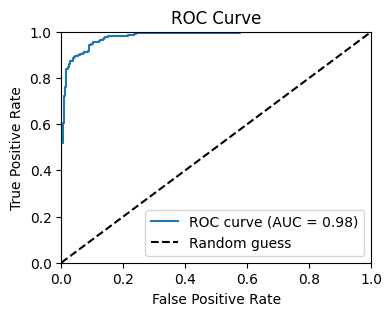

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute AUC score
roc_auc = roc_auc_score(test_labels, y_pred)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred[:, 0])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

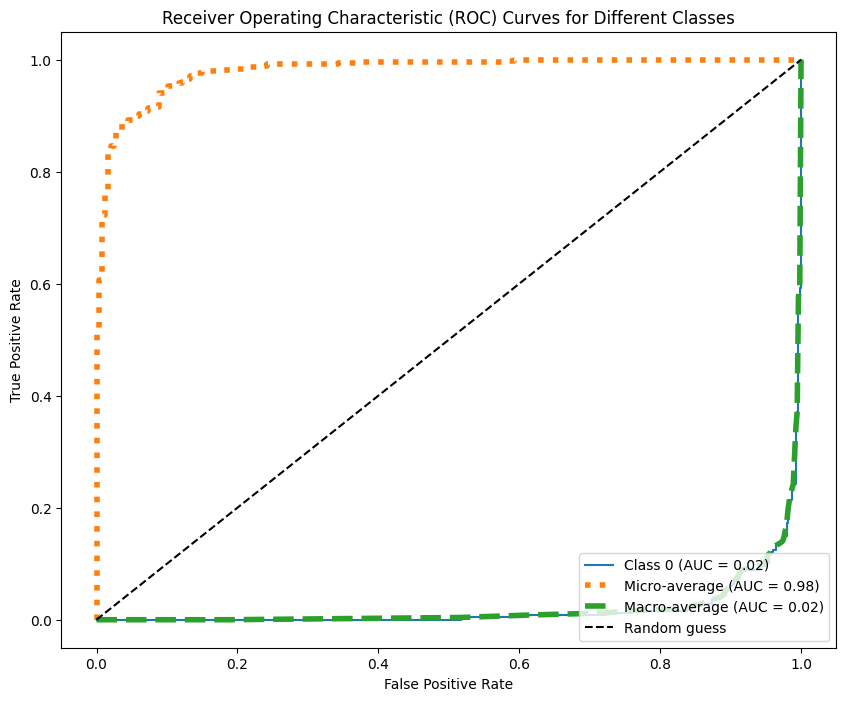

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_pred has probabilities for each class
n_classes = y_pred.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(test_labels, y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot individual class ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {roc_auc_micro:.2f})', linestyle=':', linewidth=4)

# Plot macro-average ROC curve
plt.plot(fpr_macro, tpr_macro, label=f'Macro-average (AUC = {roc_auc_macro:.2f})', linestyle='--', linewidth=4)

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Classes')
plt.legend(loc='lower right')
plt.show()


**CNN Model 2**

In [ ]:
#Setting the batch size for the cnn model
bs = 64

In [ ]:
# Set up data generators with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [ ]:
# Define the CNN Model
cancer_model = Sequential([
    Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    Conv2D(16, 3, activation=act, padding='same'),
    Conv2D(16, 3, activation=act, padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Conv2D(32, 3, activation=act, padding='same'),
    Conv2D(32, 3, activation=act, padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Conv2D(64, 3, activation=act, padding='same'),
    Conv2D(64, 3, activation=act, padding='same'),
    Conv2D(64, 3, activation=act, padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(128, 3, activation=act, padding='same'),
    Conv2D(128, 3, activation=act, padding='same'),
    Conv2D(128, 3, activation=act, padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation=act),
    BatchNormalization(),
    Dropout(0.7),
    Dense(128, activation=act),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation=act),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
], name='cnn_model')





NameError: name 'Input' is not defined

In [ ]:
# Compile the model
cancer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Setup callbacks for model saving and early stopping
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)



In [ ]:
#Fitted the model on the training and and validation dataset using the image augmentor for 100 epochs
history = cancer_model.fit(datagen.flow(training_images, training_labels, batch_size = bs),
                                     validation_data=datagen.flow(val_images, val_labels),
                                     epochs=50,
                                     callbacks=[checkpoint_cb, early_stopping_cb],
                                     verbose = 1)

In [ ]:
#Plotting the model results

#Getting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#Getting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

#No of epochs it trained
epochs_range = history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
import transformers
from transformers import ViTForImageClassification, ViTFeatureExtractor
from transformers import TrainingArguments, Trainer
import datasets
from datasets import load_metric
from sklearn.model_selection import train_test_split

# Assuming `full_data` is your dataset loaded earlier with labels
full_images = np.array([item[0] for item in full_data])
full_labels = np.array([item[1] for item in full_data])

# Splitting dataset
train_images, test_val_images, train_labels, test_val_labels = train_test_split(full_images, full_labels, test_size=0.2, random_state=42, stratify=full_labels)
val_images, test_images, val_labels, test_labels = train_test_split(test_val_images, test_val_labels, test_size=0.5, random_state=42, stratify=test_val_labels)

# Initialize ViT feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=2)

# Prepare datasets
def preprocess_images(images, labels):
    """Preprocess images and labels for training with ViT."""
    encode = feature_extractor(images, return_tensors='pt', padding=True)
    labels = torch.tensor(labels)
    return encode, labels

train_encoded, train_labels = preprocess_images(train_images, train_labels)
val_encoded, val_labels = preprocess_images(val_images, val_labels)

# Define Trainer and TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    evaluate_during_training=True,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Use train_dataset directly
    eval_dataset=val_dataset,     # Use val_dataset directly
)

# Train the model
trainer.train()

In [ ]:
# DataLoader Creation


from torch.utils.data import DataLoader, Dataset
import torch

class ImageDataset(Dataset):
    def __init__(self, images, labels, feature_extractor):
        self.images = images
        self.labels = labels
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        # Preprocess image
        image = self.feature_extractor(images=[image], return_tensors="pt").pixel_values[0]
        return image, torch.tensor(label).long()

# Create Dataset and DataLoader for training and validation sets
train_dataset = ImageDataset(train_images, train_labels, feature_extractor)
val_dataset = ImageDataset(val_images, val_labels, feature_extractor)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)


In [ ]:
# Extracting Attention Maps

def extract_attention_maps(model, dataloader):
    model.eval()
    attention_maps = []
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(model.device)
            outputs = model(images, output_attentions=True)
            attentions = outputs.attentions
            # Example: Extract and average the last layer's attention maps across all heads
            last_layer_attentions = attentions[-1]  # Get the last layer
            mean_attention = last_layer_attentions.mean(dim=1)  # Average across heads
            attention_maps.append(mean_attention.cpu().numpy())
    return np.concatenate(attention_maps, axis=0)


In [ ]:
# Calculating the TAVAC Score

from scipy.stats import pearsonr

def calculate_tavac_score(train_attention_maps, val_attention_maps):
    # Assuming train_attention_maps and val_attention_maps are processed to be directly comparable
    # Calculate Pearson correlation for each pair of attention maps and average the scores
    scores = [pearsonr(train_map.flatten(), val_map.flatten())[0] for train_map, val_map in zip(train_attention_maps, val_attention_maps)]
    tavac_score = np.mean(scores)
    return tavac_score


In [ ]:
# Assuming your model is already trained
train_attention_maps = extract_attention_maps(model, train_dataloader)
val_attention_maps = extract_attention_maps(model, val_dataloader)

# Calculate TAVAC score
tavac_score = calculate_tavac_score(train_attention_maps, val_attention_maps)
print(f"TAVAC Score: {tavac_score}")
